## Example of Analogical Reasoning Using The Test Set Provided by Mikolov et al.

We will use only part of the dataset provided, since it can not be tested as a whole by our model

In [1]:
import os
import sys
sys.path.append(os.getcwd() + "/../../") # notebooks are in a folder inside the project
from kge_from_text import folder_definitions as fd
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

Here we define some handy variables for later

In [2]:
entity_vector_name = "2016_data/entity_vectors"
entity_vector_no_min = "2016_data/entity_vectors_no_min"
type_vector_name = "2016_data/type_vectors"
conactenated_name = "2016_data/concatenated_vectors"
conactenated_name_time = "2016_data/concatenated_vectors_time"
temporal_csv = "2016_data/temporal_vectors.csv"

annotated_entity_file = "2016_data/annotated_text_with_entities"
annotated_type_file = "2016_data/annotated_text_with_types"
type_of_entity_file = "2016_data/type_to_entity_data.ttl"

## Models can be generated using input files or can be loaded (if they already exists)

In [3]:
# ENTITY
import kge_from_text.models.term_embeddings as tt

model_e = tt.TermEmbedding("entity")
model_e.fit(input_text=fd.STARTING_DATA_ROOT + annotated_entity_file, output_file_path=fd.PRODUCED_MODELS_ROOT+ "2016_data/", _iter=15, _min_count=0)

Model Already Exists. Use Override Option
ModelAlreadyLoaded. Create New Object


ModelAlreadyExistsException: 

In [5]:
# TYPE
import kge_from_text.models.term_embeddings as tt

model_t = tt.TermEmbedding("entity_no_min")
model_t.fit(input_text=fd.STARTING_DATA_ROOT + annotated_entity_file, output_file_path=fd.PRODUCED_MODELS_ROOT+ "2016_data/", _min_count=0)

In [30]:
import kge_from_text.models.term_embeddings as tt
model_e = tt.TermEmbedding("entity")
model_e.load_model(fd.PRODUCED_MODELS_ROOT + "2016_data/entity:s100:w5")

In [6]:
import kge_from_text.models.term_embeddings as tt
model_t = tt.TermEmbedding("type")
model_t.load_model(fd.PRODUCED_MODELS_ROOT + "2016_data/type:s100:w5")

In [30]:
model_t.model.similarity("Wood", "Forest")

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.43692619871461541

In [29]:
del tee

In [3]:
# Concatenate Both Models
import kge_from_text.models.tee_embeddings as tee

tee = tee.TeeEmbedding("tee")
tee.load_model("/home/vinid/Documenti/models/teeentity:s100:w5type:s100:w5")

Model Already Exists. Use Override Option
ModelAlreadyLoaded. Create New Object


## Entity embeddings and type embeddings can be concatenated in a single model

In [ ]:
# Concatenate Both Models
import kge_from_text.models.tee_embeddings as tee

tee = tee.TeeEmbedding("tee")
tee.fit(fd.PRODUCED_MODELS_ROOT + "2016_data/" , model_e, model_t, fd.STARTING_DATA_ROOT + type_of_entity_file)

# Import Bridge

The bridge is the disambiguation tool that can be used to link word in the gold standard to entities

In [7]:
import kge_from_text.bridges.bridge as bridge

br = bridge.Bridge(fd.STARTING_DATA_ROOT + "2016_data/spotlight_dbpedia_bridge", fd.STARTING_DATA_ROOT + type_of_entity_file, model_e.model, model_t.model)

In [ ]:
import kge_from_text.bridges.clean_bridge as bridge

cbr = bridge.CleanBridge()

In [ ]:
br.analogy_disambiguation_test("Canada", "dollar", "Italy", 0.8, 0.2, multiplicative=True, ignore_w=True)
#Chisinau Moldova Conakry
#Nigeria naira Cambodia
#br.bridge[br.bridge["phrase"] == "zloty"]
#br.find_and_count("Rome")

In [ ]:
br.find_and_count("dollar")

## Load Analogies, normal or annotated dataset

In [ ]:
import pandas as pd

analogies_word = pd.read_csv(fd.GOLD_STANDARDS + "mikolov", names=["First", "Second", "Third", "Fourth"], sep=" ")
analogies_annotated = pd.read_csv(fd.GOLD_STANDARDS + "annotated_mikolov", names=["First", "Second", "Third", "Fourth"], sep=" ")

In [ ]:
analogies_currency = pd.read_csv(fd.GOLD_STANDARDS + "annotated_currency", names=["First", "Second", "Third", "Fourth"], sep=" ")
analogies_currency_no_anno = pd.read_csv(fd.GOLD_STANDARDS + "currency", names=["First", "Second", "Third", "Fourth"], sep=" ")

In [ ]:
br.analogy_disambiguation("Matrix", "Reeves", "Mission Impossible", weight_1=0.75, weight_2=0.25)

## Define an evaluator and an handler and run the experiment

In [ ]:
import kge_from_text.evaluators.analogy_evaluator as aer

analogy_eval = aer.AnalogyEvaluator(br, tee, analogies_word)

In [ ]:
from kge_from_text.evaluators.evaluator_handler import EvaluatorHandler

evalu = EvaluatorHandler(fd.EVALUATION_RESULTS_ROOT, name="TEEMP-currency")
evalu.run_evaluation(analogy_eval)

In [ ]:
# ENTITY
import kge_from_text.models.term_embeddings as tt

model_e = tt.TermEmbedding("entity")
model_e.fit(input_text=fd.STARTING_DATA_ROOT + annotated_entity_file, 
            output_file_path=fd.PRODUCED_MODELS_ROOT+ "2016_data/", _iter=15, _workers=4, _size=100, _window=3)

In [ ]:
import kge_from_text.models.term_embeddings as tt
from kge_from_text.evaluators.analogy_evaluator import AnalogyEvaluator
from kge_from_text.evaluators.evaluator_handler import EvaluatorHandler

analogies_currency = pd.read_csv(fd.GOLD_STANDARDS + "annotated_currency", names=["First", "Second", "Third", "Fourth"], sep=" ")
analogies_annotated = pd.read_csv(fd.GOLD_STANDARDS + "annotated_mikolov", names=["First", "Second", "Third", "Fourth"], sep=" ")


evalu = EvaluatorHandler(fd.EVALUATION_RESULTS_ROOT, name="MANY-currency")
for win, size in [(3, 200), (5, 200), (3, 300), (5, 300)]:
# ENTITY
    model_e = tt.TermEmbedding("entity")
    model_e.fit(input_text=fd.STARTING_DATA_ROOT + annotated_entity_file, 
                output_file_path=fd.PRODUCED_MODELS_ROOT+ "2016_data/", _iter=15, _workers=4, _size=size, _window=win)
    
    analogy_eval = AnalogyEvaluator(cbr, model_e, analogies_currency)
    
    evalu.run_evaluation(analogy_eval)
    
    analogy_eval = AnalogyEvaluator(cbr, model_e, analogies_annotated)
    
    evalu.run_evaluation(analogy_eval)

In [ ]:
path = "/home/vinid/nuncodes/GoogleNews-vectors-negative300.bin"
import gensim 
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
del model

In [ ]:
# ENTITY
import kge_from_text.models.term_embeddings as tt

model_e = tt.TermEmbedding("text")
model_e.model = model

In [ ]:
import kge_from_text.models.term_embeddings as tt
from kge_from_text.evaluators.analogy_evaluator import AnalogyEvaluator
from kge_from_text.evaluators.evaluator_handler import EvaluatorHandler
import pandas as pd 
analogies_currency = pd.read_csv(fd.GOLD_STANDARDS + "currency", names=["First", "Second", "Third", "Fourth"], sep=" ")
analogies_annotated = pd.read_csv(fd.GOLD_STANDARDS + "mikolov", names=["First", "Second", "Third", "Fourth"], sep=" ")


evalu = EvaluatorHandler(fd.EVALUATION_RESULTS_ROOT, name="MANY-currency")
# ENTITY

analogy_eval = AnalogyEvaluator(cbr, model_e, analogies_currency)

evalu.run_evaluation(analogy_eval)

analogy_eval = AnalogyEvaluator(cbr, model_e, analogies_annotated)

evalu.run_evaluation(analogy_eval)

In [ ]:
lista = list(zip(analogies_word.values.tolist(),analogies_annotated.values.tolist()))
good = 0
total = 0
for a, b in lista:
    na, nb, nc = br.analogy_disambiguation(a[0], a[1], a[2])
    if na == b[0] and nb == b[1] and nc == b[2]:
        good = good + 1
    total = total + 1

In [ ]:
good/total

In [ ]:
good/total

In [ ]:
7497*0.9551820728291317 + 866*0.77251

In [ ]:
7829.99366/8363

In [ ]:
lista = list(zip(analogies_currency_no_anno.values.tolist(),analogies_currency.values.tolist()))
good = 0
total = 0
for a, b in lista:
    na, nb, nc = br.analogy_disambiguation(a[0], a[1], a[2])
    if na == b[0] and nb == b[1] and nc == b[2]:
        good = good + 1
    total = total + 1

In [30]:
from scipy.spatial.distance import cosine

1 - cosine([9, 1], [9, 2])

0.99417240262471707

In [13]:
import kge_from_text.bridges.bridge as bridge

br = bridge.TableLinkingBridge(fd.STARTING_DATA_ROOT + "2016_data/spotlight_dbpedia_bridge", fd.STARTING_DATA_ROOT + type_of_entity_file, model_e.model, model_t.model, tee)

In [6]:
import pandas as pd
import itertools
from kge_from_text.utils import helpers
from scipy.spatial.distance import cosine


import numpy as np
class TableLinkingBridge:
    """
    This class handles bridging from word to entities
    """
    def __init__(self, bridge_location, entity_to_type_location, model_entities, model_types, tee):
        """
        :param bridge_location: location of the bridge file
        :param entity_to_type_location: location of the file that connects entity with types
        :param model_entities: embedding model of the entities
        :param model_types: embedding model of the types
        """
        self.bridge = pd.read_csv(bridge_location, sep="\t", names=["phrase", "entity", "count"])

        self.map_entity_type = pd.read_csv(entity_to_type_location, header=None, delimiter=r"\s+",
                                           names=["Subject", "Property", "Object", "Point"])

        # Remove unused columns
        self.map_entity_type = self.map_entity_type.drop('Property', 1)
        self.map_entity_type = self.map_entity_type.drop('Point', 1)

        self.map_entity_type = self.map_entity_type.set_index('Subject')

        # Remove duplicated types
        self.map_entity_type = self.map_entity_type[~self.map_entity_type.index.duplicated(keep='first')]
        self.map_entity_type = self.map_entity_type['Object'].to_dict()

        self.model_entities = model_entities
        self.mode_types = model_types

        self.dict_of_default_mappings = {"United_Kingdom" : "England"}

        self.tee = tee

    def get_back(self, entity):
        """
        Given an entity, returns the matching word using the get back approach

        :param entity:
        :return:

        >>> self.get_back("Barack_Obama")
        "Barack Obama"

        >>> self.get_back("Paris,_Texas")
        "Paris"

        >>> self.get_back("Paris")
        "Paris"

        """
        if len(self.bridge[self.bridge["phrase"] == entity].values.tolist()) > 0:
            return self.bridge[self.bridge["phrase"] == entity]["phrase"].values[0]
        else:
            return self.bridge[self.bridge["entity"] == entity].sort_values(by=["count"],
                                                                            ascending=False)["phrase"].values[0]

    def find_and_count(self, entity):
        operation = self.bridge[self.bridge["phrase"] == entity]
        find = operation["entity"].values.tolist()
        count = 0
        if find:
            count = helpers.softmax(operation["count"].values.tolist())
        if len(find) == 0:
            inner_op = self.bridge[self.bridge["phrase"].str.contains(entity)]
            find = inner_op["entity"].values.tolist()
            if len(find) == 0:
                inner_op = self.bridge[self.bridge["phrase"].str.contains(entity, case=False)]
                find = inner_op["entity"].values.tolist()
            count = helpers.softmax(inner_op["count"].values.tolist())
        ordering = zip(find, count)
        rrr = list(reversed(sorted(ordering, key=lambda x: x[1])))
        find, count = zip(*rrr)
        return find, count

    def analogy_disambiguation(self, first, second, third, fourth, weight_1=1, weight_2 = 1,
                               weight_3 = 1, weight_4 = 1, weight_5 = 1, multiplicative = False):
        """
        This function implements a method to disambiguate three elements using a cross-similarity approach.

        :param first: first element of the analogy
        :param second: second element of the analogy
        :param third: third element of the analogy
        :return:
        """
        
        first_code, first_count = self.find_and_count(first)
        second_code, second_count = self.find_and_count(second)
        third_code, third_count = self.find_and_count(third)
        fourth_code, fourth_count = self.find_and_count(fourth)

        first_code = zip(first_code, first_count)
        second_code = zip(second_code, second_count)
        third_code = zip(third_code, third_count)
        fourth_code = zip(fourth_code, fourth_count)

        combinations = list(itertools.product(first_code, second_code, third_code, fourth_code))

        return_list = []
        for first_t, second_t, third_t, fourth_t in combinations:
            first = first_t[0]
            second = second_t[0]
            third = third_t[0]
            fourth = fourth_t[0]

            c_first = first_t[1]
            c_second = second_t[1]
            c_third = third_t[1]
            c_fourth = fourth_t[1]

            try:

                first_a = first
                second_a = second
                third_a = third
                fourth_a = fourth

                sim_a_b = self.model_entities.similarity(first_a, second_a)
                sim_t_a_c = self.mode_types.similarity(self.entity_to_type(first_a), self.entity_to_type(third_a))

                sim_c_d = self.model_entities.similarity(third_a, fourth_a)
                sim_t_b_d = self.mode_types.similarity(self.entity_to_type(second_a), self.entity_to_type(fourth_a))

                
                if multiplicative:
                    w_factor = (c_first * c_second * c_third * c_fourth)
                else:
                    w_factor = (c_first + c_second + c_third + c_fourth)

                first_analogy_factor = self.tee[second_a] - self.tee[first_a] + self.tee[third_a]
                second_analogy_factor = self.tee[fourth_a]
                
                factor = 1 - cosine(first_analogy_factor, second_analogy_factor)
                
                return_list.append(((first, second, third, fourth),
                                    (np.average([sim_a_b, sim_t_a_c,
                                                sim_c_d, sim_t_b_d
                                                ],
                                    weights=[weight_1,
                                             weight_2,
                                             weight_3,
                                             weight_4,
                                             ]) * factor)*w_factor,
                                    factor, w_factor,
                                    c_first, c_second, c_third, c_fourth))

            except Exception as e:
                pass

        return list(reversed(sorted(return_list, key=lambda x: x[1])))[0:10]

    def entity_to_type(self, entity):
        """
        Function used to get the specific type for an entity

        :param entity: entity in input
        :return: the type of the entity, if found. Returns owl#Thing otherwise

        >>> self.entity_to_type("Barack_Obama")
        "Politician"

        """
        if entity in self.dict_of_default_mappings:
            return self.dict_of_default_mappings[entity]

        try:
            type_res = self.map_entity_type['<http://dbpedia.org/resource/' + entity + '>']
            type_res = type_res.replace(">", "")
            type_res = type_res.replace("<http://dbpedia.org/ontology/", "")
            type_res = type_res.replace("<http://www.w3.org/2002/07/", "")
            return type_res
        except:
            return "owl#Thing"


In [7]:
import kge_from_text.bridges.bridge as bridge

br = TableLinkingBridge(fd.STARTING_DATA_ROOT + "2016_data/spotlight_dbpedia_bridge", 
                        fd.STARTING_DATA_ROOT + type_of_entity_file, 
                        model_e.model, model_t.model, tee.model)

In [72]:
br.bridge[br.bridge["phrase"].str.contains("m\*a\*s\*h", case=False)]

,phrase,entity,count
1227584,M*A*S*H,"Goodbye,_Farewell_and_Amen",2
1227585,M*A*S*H,M*A*S*H,4
1227586,M*A*S*H,M*A*S*H_(TV_series),130
1227587,M*A*S*H,M*A*S*H_(novels),6
1227588,M*A*S*H,MASH_(film),22
1227589,M*A*S*H (TV series),M*A*S*H_(TV_series),2
1227590,M*A*S*H Mania,M*A*S*H_Mania,3
1227591,M*A*S*H novels,M*A*S*H_(novels),1
1227592,M*A*S*H*,M*A*S*H_(TV_series),1
1735316,S*M*A*S*H,Smash_(band),1


In [64]:
br.bridge[br.bridge["phrase"] == "M*A*S*H"]

,phrase,entity,count
1227584,M*A*S*H,"Goodbye,_Farewell_and_Amen",2
1227585,M*A*S*H,M*A*S*H,4
1227586,M*A*S*H,M*A*S*H_(TV_series),130
1227587,M*A*S*H,M*A*S*H_(novels),6
1227588,M*A*S*H,MASH_(film),22


In [66]:
len(br.find_and_count("m*a*s*h")[0])

/home/vinid/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


786860

In [57]:
len(br.find_and_count("Titus Flavius Sabinus Vespasianus"))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [55]:
br.analogy_disambiguation("United kingdom", "English", "Ireland", "English Gaelic", 
                          weight_1=1, 
                          weight_2=1, 
                          weight_3 = 1,
                          weight_4 = 1)

/home/vinid/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [90]:
tee.model.wv.similarity("Wes_Anderson", "Luke_Wilson")

0.70330222103053464

In [ ]:
a

# Anomaly

In [5]:
# plot
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

vocab = list(model_e.model.wv.vocab)

X = model_e.model[vocab]

tsne = PCA(n_components=2)
X_tsne = tsne.fit_transform(X)



/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [7]:
dfa = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

dfa.columns = ['x', 'y', 'word']

In [45]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
    PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX dbo:<http://dbpedia.org/ontology/>
    PREFIX dbr:<http://dbpedia.org/resource/>

    PREFIX vrank:<http://purl.org/voc/vrank#>

    SELECT ?s ?v 
    FROM <http://dbpedia.org> 
    FROM <http://people.aifb.kit.edu/ath/#DBpedia_PageRank> 
    WHERE {
    {?s rdf:type dbo:OfficeHolder.}

    ?s vrank:hasRank/vrank:rankValue ?v.
    }
    ORDER BY DESC(?v) LIMIT 60
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
politicians = []
for result in results["results"]["bindings"]:
    politicians.append((result["s"]["value"]).replace("http://dbpedia.org/resource/", ""))

In [33]:
politicians = list(set(politicians))

In [46]:
politicians

['Doctor_of_Philosophy',
 'Adolf_Hitler',
 'Franklin_D._Roosevelt',
 'Joseph_Stalin',
 'George_Washington',
 'Abraham_Lincoln',
 'Richard_Nixon',
 'Winston_Churchill',
 'John_F._Kennedy',
 'Thomas_Jefferson',
 'Julius_Caesar',
 'Dwight_D._Eisenhower',
 'Theodore_Roosevelt',
 'Lyndon_B._Johnson',
 'George_H._W._Bush',
 'Jimmy_Carter',
 'Vladimir_Lenin',
 'Harry_S._Truman',
 'Woodrow_Wilson',
 'Margaret_Thatcher',
 'Christopher_Columbus',
 'Benito_Mussolini',
 'Mahmoud_Ahmadinejad',
 'Juris_Doctor',
 'Tony_Blair',
 'Mao_Zedong',
 'Benjamin_Franklin',
 'Hillary_Clinton',
 'Oliver_Cromwell',
 'Ulysses_S._Grant',
 'John_McCain',
 'Vladimir_Putin',
 'John_Kerry',
 'David_Cameron',
 'James_Madison',
 'Francisco_Franco',
 'Andrew_Jackson',
 'Saddam_Hussein',
 'Charles_de_Gaulle',
 'Gerald_Ford',
 'Mikhail_Gorbachev',
 'Muammar_Gaddafi',
 'Tacitus',
 'William_Ewart_Gladstone',
 'Al_Gore',
 'Confluence',
 'Nikita_Khrushchev',
 'Herbert_Hoover',
 'Alexander_Hamilton',
 'Otto_von_Bismarck',
 'John

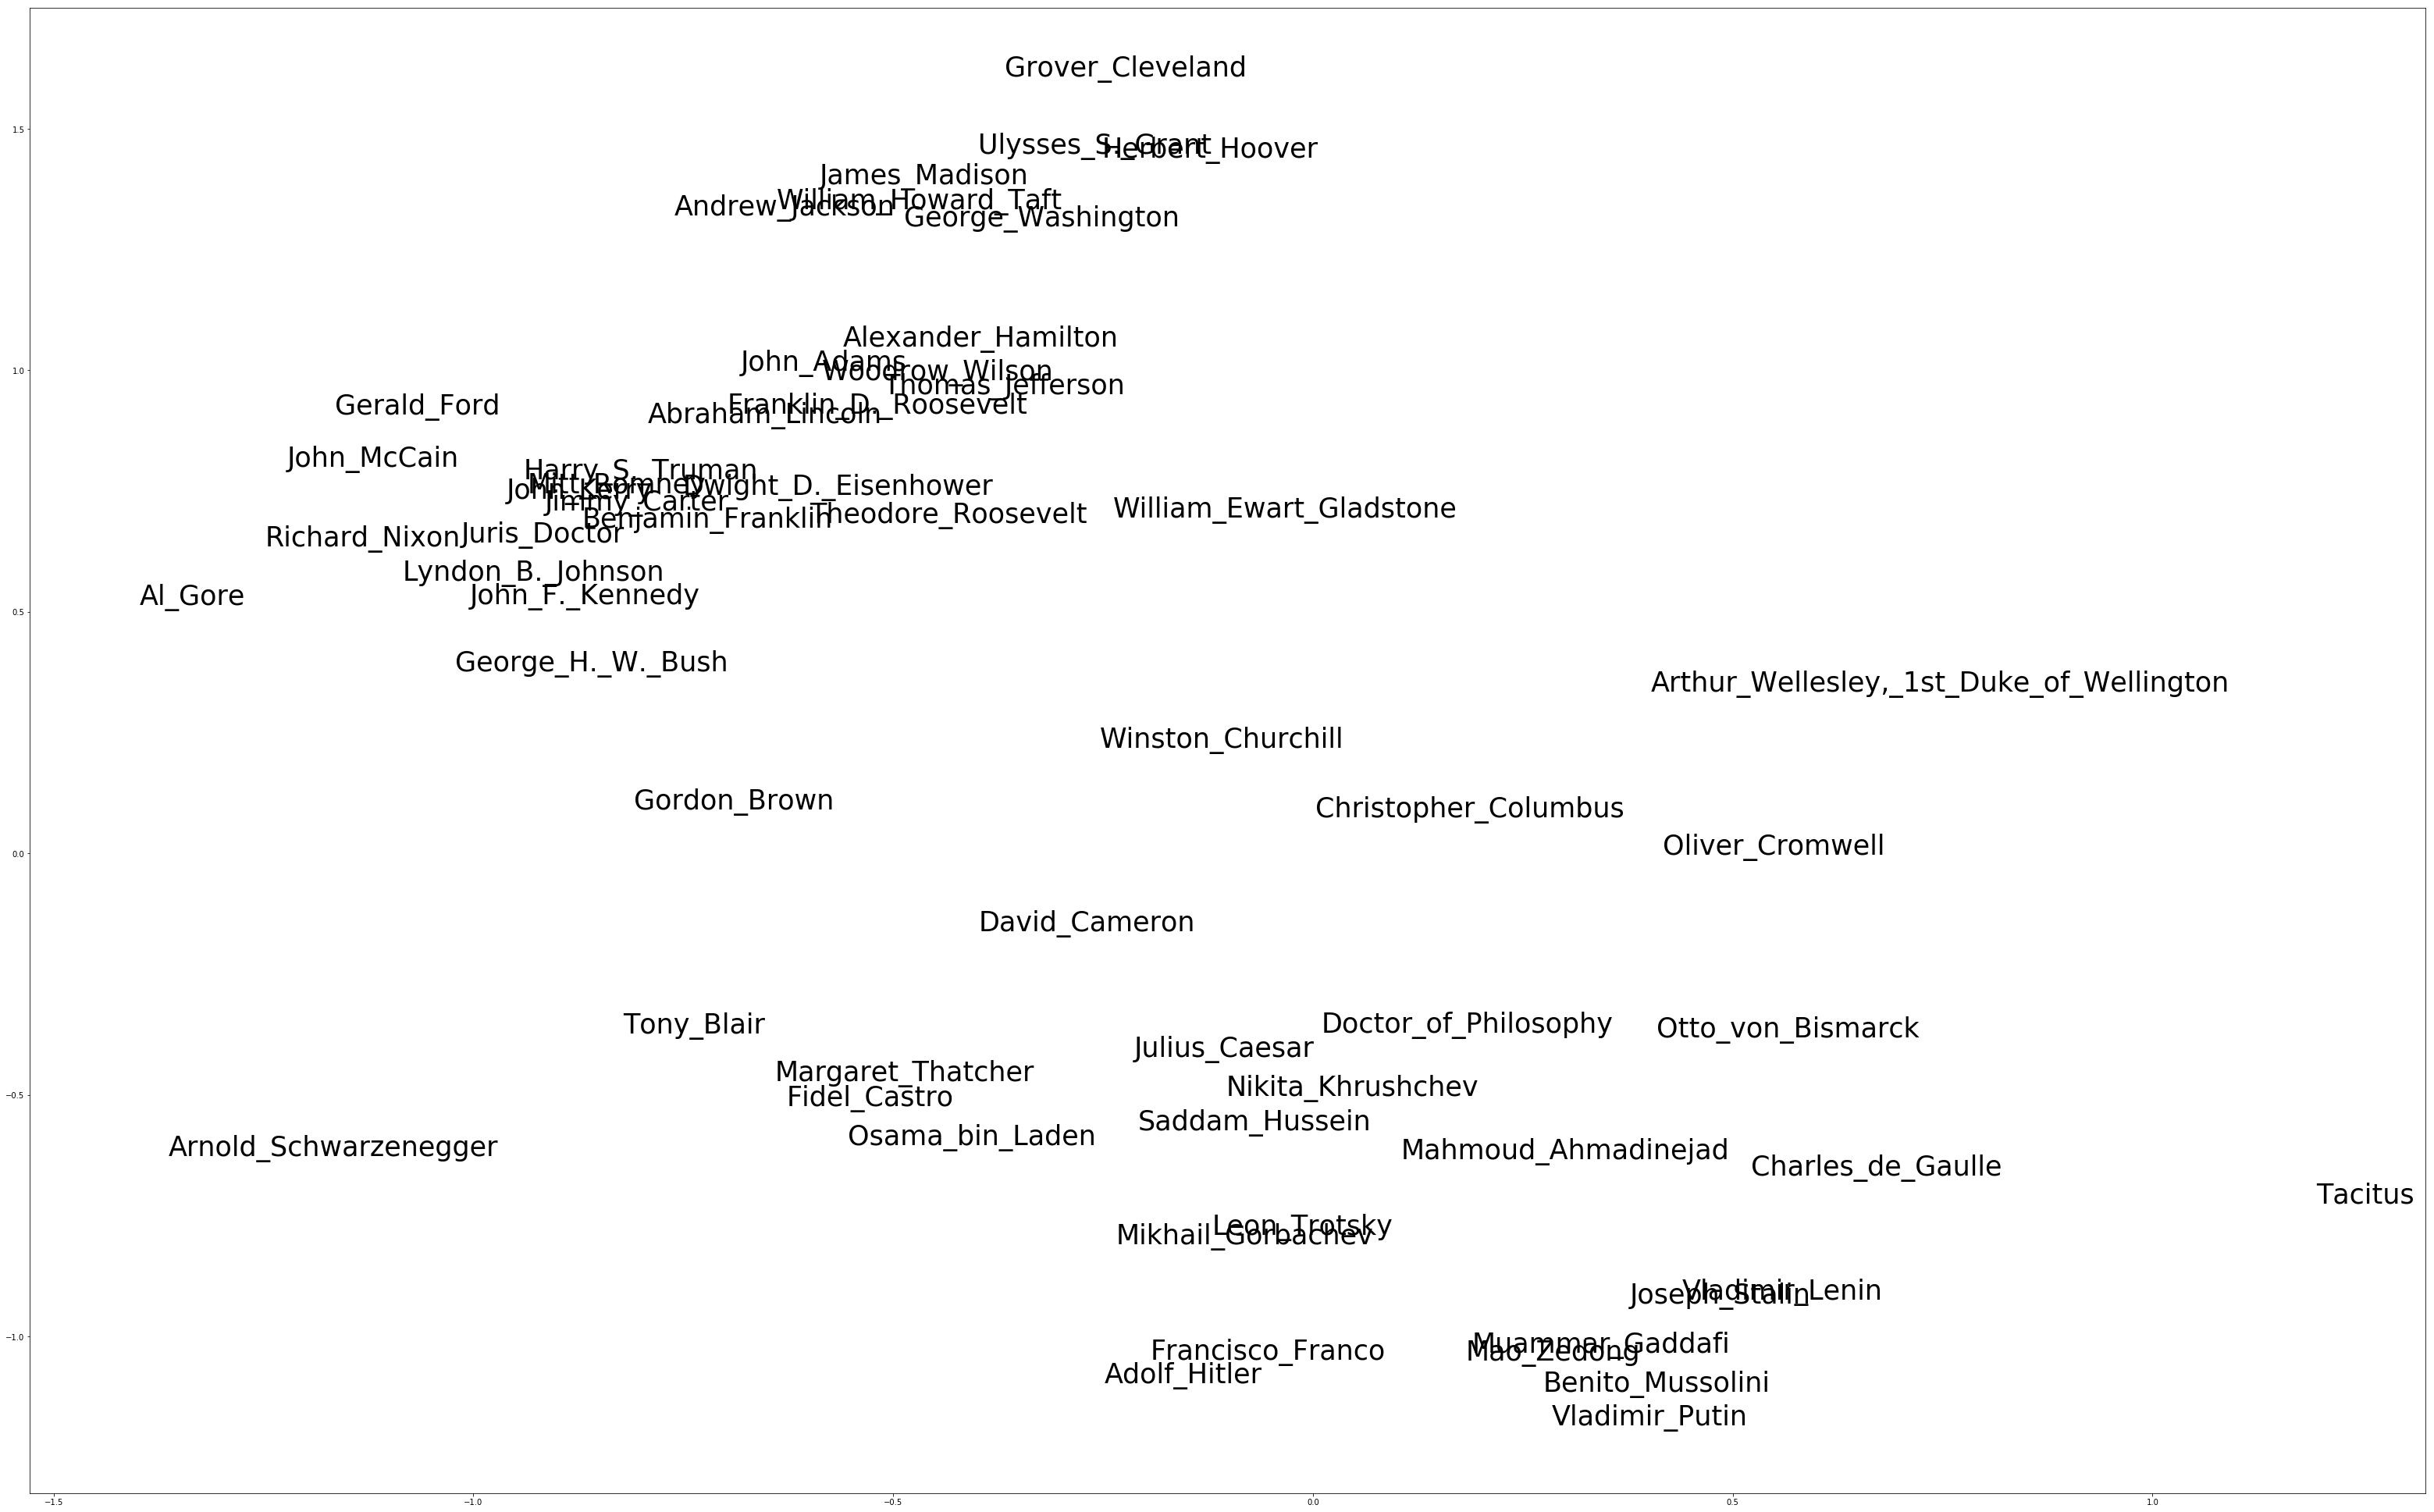

In [47]:
df = dfa[dfa['word'].isin(politicians)]


fig = plt.figure(figsize=(55, 35))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], c="g", alpha=0.0,)

for i, txt in enumerate(df['word']):
    b= ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]), size=35)
    
plt.savefig('foo.pdf')

In [10]:
fd.STARTING_DATA_ROOT + "2016_data/spotlight_dbpedia_bridge"

'/home/vinid/PycharmProjects/kge_from_text/kge_from_text/data/starting_data/2016_data/spotlight_dbpedia_bridge'

In [25]:
import pandas as pd

a = pd.read_csv(fd.STARTING_DATA_ROOT + "2016_data/spotlight_dbpedia_bridge", sep="\t", names=["phrase", "entity", "count"])

In [70]:
a[a["entity"]==("Film")].sort_values(by=["count"], ascending=False)
#a[a["entity"] == "Rum"]

,phrase,entity,count
2300066,cinematography,Film,160
1168,/film,Film,115
2491867,post-production,Film,89
1155,/Film,Film,35
2310634,concert film,Film,10
2565941,theatrically released motion pictures,Film,7
529005,David Chen,Film,3
2586862,video albums,Film,3
1374375,Moving image,Film,2
846682,Hans Christian Andersen,Film,1


In [45]:
model_e.model.similarity("Football", "Money")

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.21663996489487672

In [161]:
pa = pd.read_csv(fd.GOLD_STANDARDS + "phrase_analogies", names=["First", "Second", "Third", "Fourth"], sep=" ")

In [163]:
with open(fd.GOLD_STANDARDS + "phrase_analogies_tee", "w") as f_write:
    for index, row in pa.iterrows():
        try:
            model_e.model[row["First"]]
            model_e.model[row["Second"]]
            model_e.model[row["Third"]]
            model_e.model[row["Fourth"]]
            f_write.write(row["First"] + " " + row["Second"] + " " + row["Third"] + " " + row["Fourth"] + "\n")
        except Exception as e: 
            pass
        


/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [6]:
import pandas as pd
pad = pd.read_csv(fd.GOLD_STANDARDS + "phrase_analogies_tee", names=["First", "Second", "Third", "Fourth"], sep=" ")
len(pad)

1094

In [3]:
path = "/home/vinid/nuncodes/GoogleNews-vectors-negative300.bin"
from gensim.models import KeyedVectors

# Load Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format(path, binary=True)  

In [35]:
tee.model.most_similar(positive=["Icelandair", "Italy"], negative=["Iceland"])

[('Ala_Littoria', 0.7845418453216553),
 ('Aero_Trasporti_Italiani', 0.7753539085388184),
 ('Air_Dolomiti', 0.7705572247505188),
 ('Alitalia-Linee_Aeree_Italiane', 0.764521598815918),
 ('Air_One', 0.7567516565322876),
 ('Blue_Panorama_Airlines', 0.7487359046936035),
 ('Alitalia', 0.732791006565094),
 ('Eurofly', 0.7261620163917542),
 ('Alitalia_CityLiner', 0.7120975255966187),
 ('Wind_Jet', 0.7110211849212646)]

In [19]:
correct = 0
total = 0
with open("/home/vinid/nuncodes/errors_on_phrases", "w") as ferr:
    for index, row in pad.iterrows():
        if index%100==0:
            print(index)
        try:
            abc = tee.model.most_similar(positive=[row["Second"], row["Third"]], negative=[row["First"]])
            if row["Fourth"] == abc[0][0]:
                correct = correct + 1
            else:
                ferr.write(row["First"] + " " + row["Second"] + " " + row["Third"]
                           + " " + row["Fourth"] + " " + abc[0][0] + "\n")
                raw_input()
            total = total + 1
        except Exception as e:
            pass


0
100
200
300
400
500
600
700
800
900
1000


In [23]:
total/(len(pad))

0.5338208409506399

In [46]:
br.bridge[br.bridge["phrase"].str.contains("wizard")].sort_values(by=["count"], ascending=False)

NameError: name 'br' is not defined

# sim(a,b) > sim(a, c) experiment

In [21]:
from sematch.semantic.similarity import EntitySimilarity
sim = EntitySimilarity()

SyntaxError: Missing parentheses in call to 'print' (sparql.py, line 36)

In [48]:
model_e.model.similarity("Mark_Zuckerberg", "Facebook"),tee.model.similarity("Mark_Zuckerberg", "Facebook")

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


(0.64494571556744351, 0.62842291001384898)

### Generate Data For Multi Input


In [4]:
def clean_dbpedia(entity):
    return entity.replace("<http://dbpedia.org/resource/", "").replace(">", "")

def clean_dbpedia_prop(entity):
    return entity.replace("<http://dbpedia.org/ontology/", "").replace(">", "")

vocab = tee.model.wv.vocab


In [42]:
path = "/home/vinid/Scaricati/mappingbased_objects_en.ttl"
out_path = "/home/vinid/Scaricati/only_good_mappings_no_type"

with open(out_path, "w") as fb:
    with open(path, "r") as ff:
        for index, line in enumerate(ff):
            try:
                if index==0:
                    continue
                head, prop, tail, point = line.split()
                if prop in ['<http://www.w3.org/2000/01/rdf-schema#seeAlso>',
                         '<http://www.w3.org/2002/07/owl#differentFrom>',
                         '<http://xmlns.com/foaf/0.1/depiction>',
                         '<http://xmlns.com/foaf/0.1/logo>',
                         '<http://xmlns.com/foaf/0.1/thumbnail>']:
                    continue
                if clean_dbpedia_prop(prop) == "type":
                    continue 
                if clean_dbpedia(head) in vocab and clean_dbpedia(tail) in vocab:
                    fb.write(clean_dbpedia(head) + " " + clean_dbpedia_prop(prop) + " " + clean_dbpedia(tail) + "\n")
            except Exception as e:
                print(e)
                pass

not enough values to unpack (expected 4, got 3)


In [5]:
prop_vocab = []
path = "/home/vinid/Scaricati/only_good_mappings_no_type"
with open(path, "r") as ff:
    for line in ff:
        prop_vocab.append(line.split()[1])
prop_vocab = set(prop_vocab)

In [6]:
prop2int = {}
int2prop = {}

vocab_size_prop = len(prop_vocab) # gives the total number of unique words

for i,word in enumerate(prop_vocab):
    prop2int[word] = i
    int2prop[i] = word

In [40]:
import numpy as np
def prop_to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[prop2int[data_point_index]] = 1
    return temp

In [8]:
data_in_triples = []
path = "/home/vinid/Scaricati/only_good_mappings_no_type"
with open(path, "r") as ff:
    for line in ff:
        data_in_triples.append(line.split())

In [9]:
from random import shuffle
shuffle(data_in_triples)

In [10]:
training_tiples = data_in_triples[:-int(len(data_in_triples)*0.3)]
testing_triples = data_in_triples[-int(len(data_in_triples)*0.3):]

In [11]:
data_to_learn = training_tiples[0:100000]
data_to_test = training_tiples[100000:]

In [12]:
entities = list(map(lambda x : (x[0], x[2]), data_to_learn))

In [13]:
flat_list = [item for sublist in entities for item in sublist]

In [14]:
flat_set = set(flat_list)

In [15]:
other_good_triples = []
count_how_many = 0
for i in data_to_test:
    if i[0] in flat_set and i[2] in flat_set:
        if i[1] in {'creativeDirector', 'schoolPatron'}:
            continue
        other_good_triples.append(i)

In [16]:
len(other_good_triples)

327024

In [17]:
real_testing = other_good_triples[:10000]

In [ ]:
with open(fd.STARTING_DATA_ROOT + "learning_triples") as lt

In [184]:
xx = set(list(map(lambda x: x[1], data_to_learn)))

In [185]:
yy = set(list(map(lambda x: x[1], real_testing)))

In [31]:
tee = model_e

In [18]:
from keras.models import Model
from keras import layers
from keras import Input

entity_vocabulary_size = len(tee.model["Barack_Obama"])
prop_vocabulary_size = vocab_size_prop
answer_vocabulary_size = len(tee.model["Barack_Obama"])

entity_input = Input(shape=(entity_vocabulary_size,))
#entity_input = layers.Dense(50)(entity_input)

property_input = Input(shape=(prop_vocabulary_size,))
embedded_property = layers.Embedding(300, prop_vocabulary_size)(property_input)
encoded_delta_force = layers.Dense(250, activation='relu')(property_input)
encoded_delta = layers.Dense(200, activation='tanh')(encoded_delta_force)
encoded_property = layers.Dense(100)(encoded_delta) 

concatenated = layers.concatenate([entity_input, encoded_property], axis=-1)

belta = layers.Dense(200, activation='tanh')(concatenated)
answer = layers.Dense(answer_vocabulary_size)(belta)

model = Model([entity_input, property_input], answer)
model.compile(loss='mean_absolute_error', optimizer='rmsprop')

Using TensorFlow backend.


In [19]:
def to_vectors(triple):
    return tee.model[triple[0]], prop_to_one_hot(triple[1], vocab_size_prop), tee.model[triple[2]]
    

In [62]:
entities_input = []
properties_input = []
entities_output = []

for x in training_tiples[:3000]:
    dada = to_vectors(x)
    entities_input.append(dada[0])
    properties_input.append(dada[1])
    entities_output.append(dada[2])
    

entities_input = np.array(entities_input)
properties_input = np.array(properties_input)
entities_output = np.array(entities_output)

In [59]:
len(training_tiples)

1256875

In [1]:
model.fit([entities_input, properties_input], entities_output, epochs=100, batch_size=1000)

NameError: name 'model' is not defined

In [25]:
from scipy.spatial.distance import cosine
def top_predicates_connecting(ent_1, ent_2, topn=10):
    input_one = np.array([tee.model[ent_1]])
    preds = []
    for pred in prop_vocab:
        input_two = np.array([prop_to_one_hot(pred, vocab_size_prop)])
        arr = model.predict([input_one, input_two])
        sim = 1 - cosine(arr, tee.model[ent_2])
        preds.append((pred, sim))
    return sorted(preds, key=lambda x: x[1], reverse=True)[0:topn]
        

In [58]:
top_predicates_connecting("Tom_O'Horgan", "Chicago")

[('foundationPlace', 0.63750314712524414),
 ('residence', 0.62782984972000122),
 ('jurisdiction', 0.61015510559082031),
 ('hometown', 0.60591411590576172),
 ('fundedBy', 0.60076594352722168),
 ('birthPlace', 0.59114557504653931),
 ('state', 0.589976966381073),
 ('deathPlace', 0.58987975120544434),
 ('locationCity', 0.58895134925842285),
 ('secondCommander', 0.58666801452636719)]

In [57]:
training_tiples[220206]

["Tom_O'Horgan", 'birthPlace', 'Chicago']

In [53]:
input_one = np.array([tee.model["Paris"]])
input_two = np.array([prop_to_one_hot("capital", vocab_size_prop)])

tee.model.most_similar(model.predict([input_one, input_two]))

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


[('Paris', 0.884772777557373),
 ('Alexandre_Lenoir', 0.8237810730934143),
 ('Seine-et-Oise', 0.8138894438743591),
 ('Pierre-Jules_Cavelier', 0.8131248950958252),
 ('Villiers-sur-Marne', 0.8112963438034058),
 ('Assistance_Publique_–_Hopitaux_de_Paris', 0.8101568818092346),
 ('Abd-el-Tif_prize', 0.8062295913696289),
 ('France', 0.8060406446456909),
 ('Jules-Clement_Chaplain', 0.8050708174705505),
 ('6th_arrondissement_of_Paris', 0.8048877120018005)]

[('United_States', 0.9134023189544678),
 ('France', 0.7185734510421753),
 ('Canada', 0.691838800907135),
 ('Mexico', 0.6719715595245361),
 ('EUCLID_(university)', 0.6687586903572083),
 ('Tangier_International_Zone', 0.6590375304222107),
 ('Spain', 0.6578062176704407),
 ('Pacific_Alliance', 0.6478729248046875),
 ('Germany', 0.639794647693634),
 ('Netherlands', 0.6371276378631592)]

In [45]:
prop_encoder = Model(property_input, encoded_property)


In [41]:
prop_to_one_hot("nationality", vocab_size_prop).shape

(611,)

In [43]:
from scipy.spatial.distance import cosine

def sim_inner(x):
    return prop_encoder.predict(np.array([prop_to_one_hot(x, vocab_size_prop)]))

def similarity_properties(x, y):
    return 1 - cosine(sim_inner(x), sim_inner(y))

In [46]:
similarity_properties("nationality", "country")

0.91154003143310547

In [23]:
import itertools

props = list(itertools.combinations(prop_vocab, 2))


In [189]:
pairs = []
for a, b in props:
    pairs.append((a,b, similarity_properties(a,b)))
    
    
    

In [188]:
sorted(pairs, key=lambda x: x[2], reverse=True)

[('nationality', 'country', 0.98477303981781006),
 ('locationCountry', 'country', 0.96970438957214355),
 ('nationality', 'countryOrigin', 0.96781724691390991),
 ('countryOrigin', 'country', 0.96727895736694336),
 ('countySeat', 'largestCity', 0.96573144197463989),
 ('sourceCountry', 'country', 0.96305197477340698),
 ('locationCountry', 'usingCountry', 0.96140938997268677),
 ('spokenIn', 'sourceCountry', 0.95897221565246582),
 ('musicFusionGenre', 'genre', 0.95681089162826538),
 ('stylisticOrigin', 'genre', 0.9566948413848877),
 ('nationality', 'sourceCountry', 0.95620352029800415),
 ('associatedBand', 'associatedMusicalArtist', 0.95441049337387085),
 ('mayor', 'party', 0.95420271158218384),
 ('locationCountry', 'countryOrigin', 0.95390492677688599),
 ('industry', 'product', 0.9526405930519104),
 ('stylisticOrigin', 'musicFusionGenre', 0.95224487781524658),
 ('daylightSavingTimeZone', 'timeZone', 0.95111191272735596),
 ('countySeat', 'city', 0.94984263181686401),
 ('sire', 'raceHorse', 